# Let's try to get Gang's plots reproduced

In [62]:
import matplotlib.pyplot as plt
import uproot
import csv
import numpy as np
import combineHistos

In [74]:
global mu_allowed 
mu_allowed = False

def get_data(filename, importantColumn=1, delr = ' '):
    output = []
    with open(filename) as file:
        line_reader = []
        if delr=='':
            line_reader = csv.reader(file)
        else:
            line_reader = csv.reader(file, delimiter=delr)
        for row in line_reader:
            output.append(float(row[importantColumn]))
    return np.array(output)

def  get_epsilon(sigIn, path_to_eff, datg, dtyp):
    # I'm not entirely sure what cut efficiency He pulls, so I'll just do the ratio of the first to the last for now
    # efficiencies = get_data(path_to_eff, importantColumn=0, delr=' ')
    # # print(efficiencies)
    # epsee = 6e-3 if typ=='JF' else 1
    # print(sigIn*(efficiencies[-1]/efficiencies[0])*(10**3)*35.9 * epsee)
    # return sigIn*(efficiencies[-1]/efficiencies[0])*(10**3)*35.9 * epsee
    epsilsons = {'ZZ': 301.185,
                 'WZ': 215.361,
                 'ttbarJF': 82.2581,
                 'W3j': 707.111}
    return epsilsons[dtyp]

def to_plot(datasDict, eff_path_dict, datgr):
    sigs = {'JF':{'ttbarJF':63.83, 'W3j':380.8}, 
            'diboson':{'WZ':24.61, 'ZZ':35.19}}
    # print(datasDict)
    # epsilons = []
    # for dt in datasDict:
    #     thisEps = get_epsilon(sigs[datgr][dt], eff_path_dict[dt], datgr)
    #     epsilons.append(thisEps)
    # print("hello", epsilons)
    # print([get_epsilon(sigs[datgr][dt], eff_path_dict[dt], datgr)*datasDict[dt] for dt in datasDict])
    return (1.3 if datgr=='diboson' else 1) * np.sum(np.array([get_epsilon(sigs[datgr][dt], eff_path_dict[dt], datgr, dt)*datasDict[dt] for dt in datasDict]), axis=0)

def diboson_plot(datasDict,eff_path_dict):
    sig_WZ = 24.61
    sig_ZZ = 35.19 # check if these match with what I had found
    return 1.3 * (get_epsilon(sig_WZ, eff_path_dict['WZ'], 'diboson') * datasDict['WZ'] + get_epsilon(sig_ZZ, eff_path_dict['ZZ'], 'diboson')*datasDict['ZZ'])
    
def JF_plot(datasDict,eff_path_dict):
    sig_ttbar = 63.83
    sig_W3j = 380.8# 408.7 for 14TeV # check if these match with what I had found
    return (get_epsilon(sig_ttbar, eff_path_dict['ttbarJF'], 'JF') * datasDict['ttbarJF'] + get_epsilon(sig_W3j, eff_path_dict['W3j'], 'JF')*datasDict['W3j'])

def file_path_formatting(inDir, tag, dtp, is_dib):
    # print(dtp)
    return inDir + tag + ('jj' if is_dib else '') + dtp+ ('_ee' if not is_dib else '')+ '.dat'

def my_scaling(eventType):
    eff_dict = {'ttbar': {'sigma': 63.83, 'events': (204_320, 1)},
                'W3j': {'sigma': 380.8, 'events': (209_675, 98)},
                'WZ2j': {'sigma': 24.61, 'events': (212_215, 225)},
                'ZZ2j': {'sigma': 33.19, 'events': (213_388, 131)}}
    JF_extra = 1/4 if mu_allowed else 1
    DB_extra = 1/2.2 if mu_allowed else 2.6
    adhocExtra = JF_extra if eventType=='ttbar' or eventType == 'W3j' else DB_extra
    ratio = "{:e}".format(eff_dict[eventType]['events'][1]/eff_dict[eventType]['events'][0])
    print(eventType, ratio)
    return 35.9 * eff_dict[eventType]['sigma'] * eff_dict[eventType]['events'][1]/eff_dict[eventType]['events'][0] * adhocExtra
    # return 1
    

In [75]:
path_to_Gang = '/Users/dysonk/Work/Gang_analysis/'
gang_diboson_path = 'prompt_NR_highSR1/'

# WZ_Gang_raw_mllWj_file_name = path_to_Gang+gang_diboson_path+'Mll_jjWZ.dat'
# WZ_MllWj_raw_Masses = get_data(WZ_Gang_raw_mllWj_file_name)
# eps_WZ = get_epsilon(sig_WZ, path_to_Gang+gang_diboson_path+'cut_eff_jjWZ.dat')
# ZZ_Gang_raw_mllWj_file_name = path_to_Gang+gang_diboson_path+'Mll_jjZZ.dat'
# ZZ_MllWj_raw_Masses = get_data(ZZ_Gang_raw_mllWj_file_name)
# eps_ZZ = get_epsilon(sig_ZZ, path_to_Gang+gang_diboson_path+'cut_eff_jjZZ.dat')


CMS_mllWj1_file_name = path_to_Gang+gang_diboson_path+'mllW_1.dat'
CMS_mllWj3_file_name = path_to_Gang+gang_diboson_path+'mllW_3.dat'
CMS_to_plot = get_data(CMS_mllWj3_file_name) - get_data(CMS_mllWj1_file_name)

# print(WZ_MllWj_raw_Masses)
# with open(WZ_Gang_raw_mllWj_file_name) as File:
#     Line_reader = csv.reader(File, delimiter=' ')
#     for row in Line_reader:
#         WZ_MllWj_raw_Masses.append(float(row[1]))



[  0.   0.  10.  83. 174. 254. 211. 166. 119.  94.  71.  59.  55.]


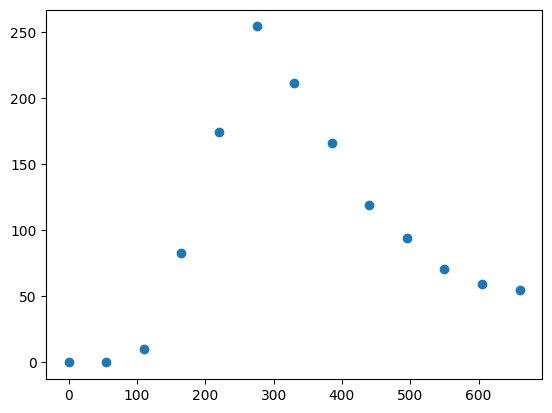

In [76]:

fromWZ = combineHistos.get_data('WZ2j', 'Mass_2jW2l','/Users/dysonk/Work/new/AnalysisOutput/')
# print(fromWZ)
plt.scatter(np.linspace(fromWZ['bounds'][0], fromWZ['bounds'][1], len(fromWZ['data'])), fromWZ['data'])

In [77]:
scientific_notation="{:e}".format(0.000009732)
print(scientific_notation)


9.732000e-06


[ 0.  0.  1.  9. 27. 39. 29. 27. 14. 13. 14.  4. 11.]
WZ2j 1.060246e-03
[ 0.  0.  1.  5. 28. 26. 21. 18.  7.  8.  4.  2.  1.]
ZZ2j 6.139052e-04
[ 0.  0.  0.  0.  0.  0.  4. 15. 23. 22. 14. 11. 12. 19. 11.  8.  8.  8.
  4.  5.  4.  3.  7.  2.  6.]
WZ2j 1.060246e-03
[ 0.  0.  0.  0.  1.  0.  6.  8. 17. 18. 11. 16. 13.  6.  8.  2.  4.  3.
  1.  4.  1.  2.  1.  2.  0.]
ZZ2j 6.139052e-04
[ 0.  0.  0.  0.  1.  6. 10. 36. 34. 23. 14. 13. 13. 12.  9.  8.  7.  3.
  5.]
WZ2j 1.060246e-03
[ 0.  0.  0.  0.  1.  5. 13. 26. 20. 14. 12.  9.  4.  3.  6.  3.  4.  2.
  2.]
ZZ2j 6.139052e-04
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ttbar 4.894283e-06
[ 0.  2. 11. 20. 22. 21. 11. 11.  7.  5.  6.  3.  3.]
W3j 4.673900e-04
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
ttbar 4.894283e-06
[ 0.  0.  0.  1.  1. 14. 10.  8. 10. 10. 13.  6.  7.  7.  9.  5.  1.  4.
  3.  3.  3.  1.  2.  1.  3.]
W3j 4.673900e-04
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ttbar 4.89428

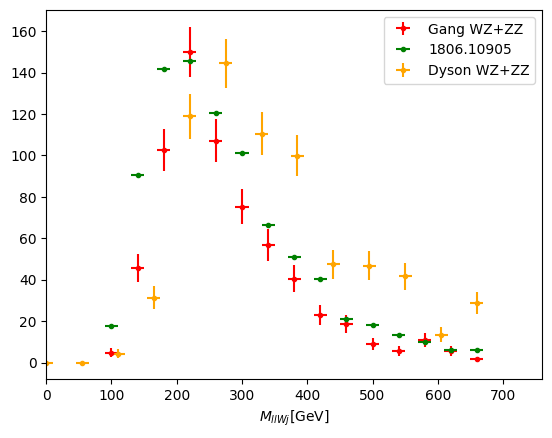

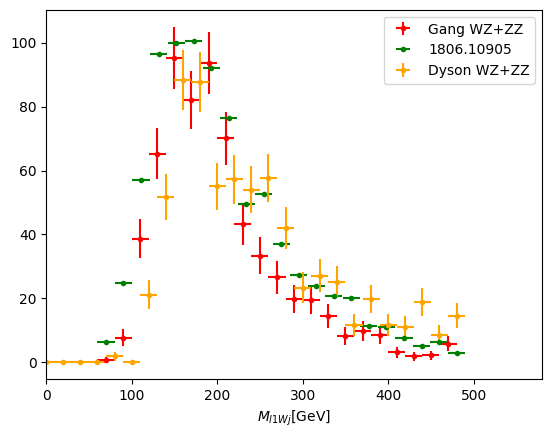

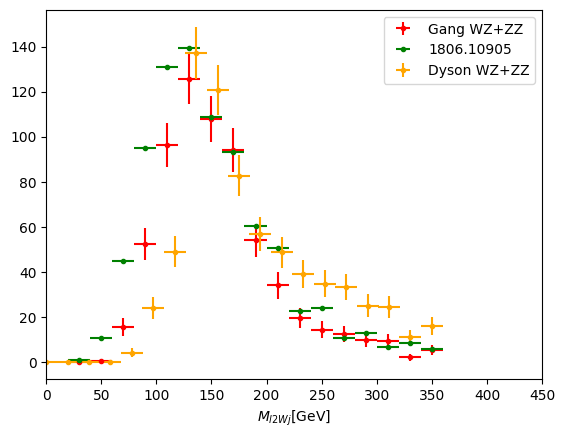

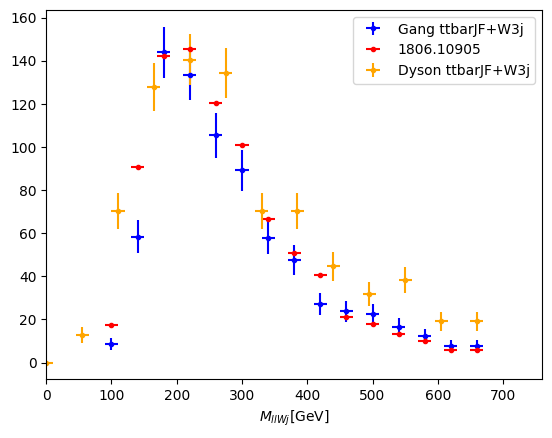

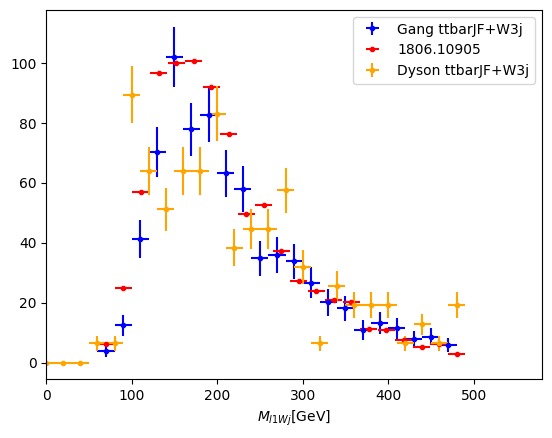

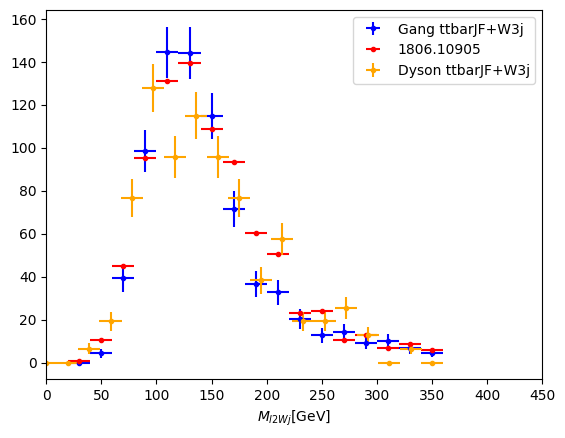

In [78]:
GangFileTags = {'ll':'MllW_',
                 'l1':'Ml1W_',
                 'l2':'Ml2W_'}
CMSFileTags = {'ll': 'mllW_',
               'l1': 'ml1W_',
               'l2': 'ml2W_'}
plotTitles = {'ll': '$M_{llWj}$',
              'l1': '$M_{l1Wj}$',
              'l2': '$M_{l2Wj}$'}
plot_lc = {'diboson': {'label':'WZ+ZZ', 'color':'red', 'CMScolor':'green'},
               'JF': {'label':'ttbarJF+W3j', 'color':'blue', 'CMScolor':'red'}}

CMS_linspaces = {'ll': np.linspace(100, 660, 15),
                 'l1': np.linspace(70, 480, 21), 
                 'l2': np.linspace(30, 350, 17)}
GangdatGroups = {'diboson': ['WZ', 'ZZ'], 'JF': ['ttbarJF', 'W3j']}
MydatGroups = {'diboson': ['WZ2j', 'ZZ2j'], 'JF': ['ttbar', 'W3j']}
gang_paths = {'diboson':'prompt_NR_highSR1/',
              'JF': 'jetfake_NR_highSR1/'}
my_start_dir = f'/Users/dysonk/Work/Good comparisons/{'muAnde' if mu_allowed else 'just_ee'}/AnalysisOutput/'
my_FileTags = {'ll': 'Mass_2jW2l',
               'l1': 'Mass_2jW1l0',
               'l2': 'Mass_2jW1l1'}

my_scale_factor = {'ZZ2j': 1,
                 'WZ2j': 1,
                 'ttbar': 1,
                 'W3j': 1}
# my_scale_factor = {'ZZ2j': 301.185e-2,
#                  'WZ2j': 215.361e-2,
#                  'ttbar': 82.2581/2,
#                  'W3j': 707.111e-2}
for dg in GangdatGroups:
    init_dir = path_to_Gang+gang_paths[dg]

    for htyp in GangFileTags:
        is_dibson = True if dg=='diboson' else False
        # print(is_dibson)
        fig, axes = plt.subplots()
        dattypes = GangdatGroups[dg]
        GangFileNames = {dtyp: file_path_formatting(init_dir, GangFileTags[htyp], dtyp, is_dibson) for dtyp in dattypes}
        # print(GangFileNames)
        datas = {dtyp: get_data(GangFileNames[dtyp]) for dtyp in dattypes}
        efficiencies = {dtyp: file_path_formatting(init_dir, GangFileTags[htyp], dtyp, is_dibson) for dtyp in dattypes}
        theseMasses = to_plot(datas, efficiencies, dg)
        Mass_range = get_data(GangFileNames[GangdatGroups[dg][0]], importantColumn=0)
        axes.set_xlabel(plotTitles[htyp]+'[GeV]')
        axes.errorbar(Mass_range, theseMasses, xerr=10, yerr=(theseMasses)**(1/2), label = 'Gang '+plot_lc[dg]['label'], color=plot_lc[dg]['color'], fmt='.')


        CMS_to_plot = get_data(init_dir+CMSFileTags[htyp]+'3.dat') - get_data(init_dir+CMSFileTags[htyp]+'1.dat')
        # axes.scatter(CMS_linspaces[htyp], CMS_to_plot, label='1806.10905', color=plot_lc[dg]['CMScolor'])
        axes.errorbar(CMS_linspaces[htyp], CMS_to_plot, xerr = 10, label='1806.10905', color=plot_lc[dg]['CMScolor'], fmt='.')
        myData = {}
        my_y = np.zeros(50)
        myDataPlot = 0
        for dt in MydatGroups[dg]:
            myData.update({dt:combineHistos.get_data(dt, my_FileTags[htyp], my_start_dir)})
        # print(myData[0]['bounds'])
            my_y = np.linspace(myData[dt]['bounds'][0], myData[dt]['bounds'][1], len(myData[dt]['data']))
            # (1.3*2.3 if dg=='diboson' else 0.625) * 
            myDataPlot = my_scaling(dt) * myData[dt]['data'] if type(myDataPlot)==int else myDataPlot + my_scaling(dt) * myData[dt]['data']
            # print(myDataPlot)
        # if dg == 'diboson':
        plt.errorbar(my_y,  myDataPlot, xerr=10, yerr=(myDataPlot)**(1/2), label=f'Dyson {plot_lc[dg]['label']}', color = 'orange', fmt='.')

        axes.set_xlim(0, CMS_linspaces[htyp][-1]+100)
        axes.legend()

TypeError: get_epsilon() missing 1 required positional argument: 'dtyp'

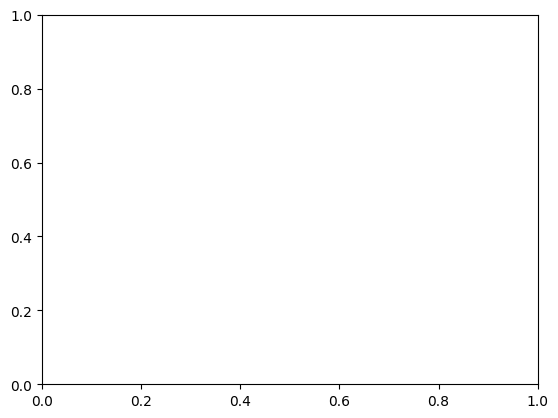

In [ ]:
GangFileTags = {'ll':'MllW_jj',
                 'l1':'Ml1W_jj',
                 'l2':'Ml2W_jj'}
CMSFileTags = {'ll': 'mllW_',
               'l1': 'ml1W_',
               'l2': 'ml2W_'}
plotTitles = {'ll': '$M_{llWj}$',
              'l1': '$M_{l1Wj}$',
              'l2': '$M_{l2Wj}$'}
CMS_linspaces = {'ll': np.linspace(100, 660, 15),
                 'l1': np.linspace(70, 480, 21), 
                 'l2': np.linspace(30, 350, 17)}
init_dir = path_to_Gang+gang_diboson_path

for htyp in GangFileTags:
    fig, axes = plt.subplots()
    dattypes = ['WZ', 'ZZ']
    GangFileNames = {dtyp: init_dir+GangFileTags[htyp]+dtyp+'.dat' for dtyp in dattypes}
    datas = {dtyp: get_data(GangFileNames[dtyp]) for dtyp in dattypes}
    theseMasses = diboson_plot(datas, {dtyp:init_dir+f'cut_eff_jj{dtyp}.dat' for dtyp in dattypes})
    Mass_range = get_data(GangFileNames['WZ'], importantColumn=0)
    axes.set_xlabel(plotTitles[htyp]+'[GeV]')
    axes.scatter(Mass_range, theseMasses, label='WZ+ZZ', color='red')

    #now for the CMS data
    CMS_to_plot = get_data(init_dir+CMSFileTags[htyp]+'3.dat') - get_data(init_dir+CMSFileTags[htyp]+'1.dat')
    axes.scatter(CMS_linspaces[htyp], CMS_to_plot, label='1806.10905', color='green')
    axes.legend()
    # axes.scatter()

{'W3j': array([0.011985  , 0.0741573 , 0.181273  , 0.164794  , 0.130337  ,
       0.113109  , 0.0734082 , 0.0621723 , 0.0337079 , 0.0307116 ,
       0.0299625 , 0.0209738 , 0.0164794 , 0.00973783, 0.0104869 ]), 'ttbarJF': array([0.00218723, 0.0726159 , 0.190289  , 0.206474  , 0.160542  ,
       0.111111  , 0.0726159 , 0.0463692 , 0.040245  , 0.0262467 ,
       0.0174978 , 0.019685  , 0.00612423, 0.00874891, 0.00262467])}


TypeError: get_epsilon() missing 1 required positional argument: 'dtyp'

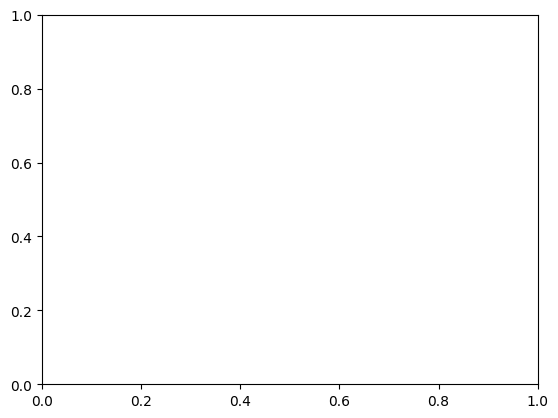

In [8]:
gang_JF_path = 'jetfake_NR_highSR1/'
GangFileTags = {'ll':'MllW_',
                 'l1':'Ml1W_',
                 'l2':'Ml2W_'}
CMSFileTags = {'ll': 'mllW_',
               'l1': 'ml1W_',
               'l2': 'ml2W_'}
plotTitles = {'ll': '$M_{llWj}$',
              'l1': '$M_{l1Wj}$',
              'l2': '$M_{l2Wj}$'}
CMS_linspaces = {'ll': np.linspace(100, 660, 15),
                 'l1': np.linspace(70, 480, 21), 
                 'l2': np.linspace(30, 350, 17)}
init_dir = path_to_Gang+gang_JF_path

for htyp in GangFileTags:
    fig, axes = plt.subplots()
    dattypes = ['W3j', 'ttbarJF']
    GangFileNames = {dtyp: init_dir+GangFileTags[htyp]+dtyp+'_ee.dat' for dtyp in dattypes}
    datas = {dtyp: get_data(GangFileNames[dtyp]) for dtyp in dattypes}
    print(datas)
    theseMasses = JF_plot(datas, {dtyp:init_dir+f'cut_eff_{dtyp}_ee.dat' for dtyp in dattypes})
    Mass_range = get_data(GangFileNames[dattypes[0]], importantColumn=0)
    axes.set_xlabel(plotTitles[htyp]+'[GeV]')
    axes.scatter(Mass_range, theseMasses, label='ttbarJF+W3j', color='red')

    #now for the CMS data
    CMS_to_plot = get_data(init_dir+CMSFileTags[htyp]+'3.dat') - get_data(init_dir+CMSFileTags[htyp]+'1.dat')
    axes.scatter(CMS_linspaces[htyp], CMS_to_plot, label='1806.10905', color='blue')
    axes.legend()

In [9]:
Mass_range = get_data(WZ_Gang_raw_mllWj_file_name, importantColumn=0)
WZ_eff_path = path_to_Gang+gang_diboson_path+'cut_eff_jjWZ.dat'
ZZ_eff_path = path_to_Gang+gang_diboson_path+'cut_eff_jjZZ.dat'
MllWjj_to_plot = diboson_plot(ZZ_MllWj_raw_Masses, WZ_MllWj_raw_Masses, WZ_eff_path, ZZ_eff_path)
print(Mass_range)
print(MllWjj_to_plot)
plt.scatter(Mass_range, MllWjj_to_plot)

NameError: name 'WZ_Gang_raw_mllWj_file_name' is not defined

[  0.89686099  10.76233184  44.84304933  95.06726457 130.94170404
 139.46188341 108.96860987  93.2735426   60.53811659  50.67264574
  22.86995516  24.21524664  10.76233184  13.0044843    6.7264574
   8.52017937   5.82959641]


ValueError: x and y must be the same size

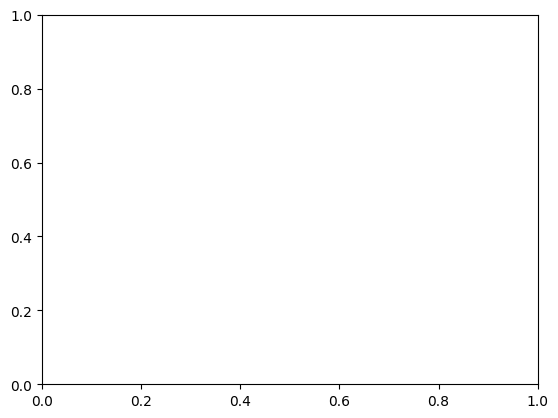

In [10]:
print(CMS_to_plot)
plt.scatter(np.linspace(100, 600, 15), CMS_to_plot)

# Cut efficiencies      

float64
float64
{'WZ2j': array([1.        , 0.03924793, 0.01234126, 0.01098886, 0.00106025]), 'ttbar': array([1.00000000e+00, 2.44714174e-05, 9.78856695e-06, 9.78856695e-06,
       0.00000000e+00]), 'W3j': array([1.00000000e+00, 6.39418147e-02, 2.02265411e-02, 1.70788124e-02,
       4.67390008e-04]), 'ZZ2j': array([1.00000000e+00, 6.85699290e-02, 8.58530002e-03, 7.98076743e-03,
       6.13905187e-04])}
[ 5.  9. 13. 17. 21.]


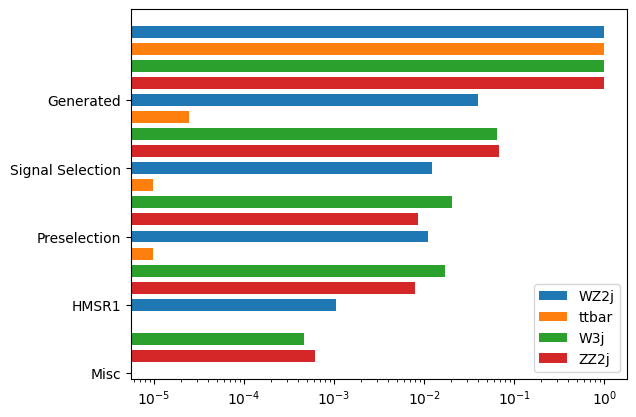

In [11]:
GangJF_Path = path_to_Gang + gang_paths['JF']
GangDB_Path = path_to_Gang + gang_paths['diboson']
DysonEffs = {'WZ2j': [212215, 8329, 2619, 2332, 225], 
             'ttbar': [204320, 5, 2, 2, 0], 
             'W3j': [209675, 13407, 4241, 3581, 98],
             'ZZ2j': [213388, 14632, 1832, 1703, 131]}
y_pos = [1]
for i in range(4):
    y_pos.append(y_pos[i]+len(DysonEffs))
y_pos = np.array(y_pos, dtype=float)
print(y_pos.dtype)
print(np.ones(len(y_pos)).dtype)
for evT in DysonEffs:
    DysonEffs[evT] = np.array(DysonEffs[evT])/DysonEffs[evT][0]
print(DysonEffs)
cuts = ('Generated', 'Signal Selection', 'Preselection', 'HMSR1', 'Misc')


fig, ax = plt.subplots()
barwidth = 0.7
for evT in DysonEffs:
    ax.barh(y_pos, DysonEffs[evT], height=barwidth, label=evT)
    y_pos += np.ones(len(y_pos))
print(y_pos)
ax.set_yticks(y_pos, labels=cuts)
ax.invert_yaxis()
ax.set_xscale('log')
ax.legend()

In [15]:
GangWZeffs = 100-100*np.array([2998855.00000, 6683.00000, 1574.00000, 975.00000, 731.00000])/2998855
print(GangWZeffs)


[ 0.         99.77714828 99.9475133  99.96748759 99.97562403]


In [16]:
myWZeffs = 100 - 100*np.array([212215, 72604, 17135, 15269, 1553])/212215
print(myWZeffs)

[ 0.         65.7875268  91.92564145 92.80493839 99.26819499]


In [18]:
myW3jeffs = 100 - 100* np.array([213388, 109774, 9449, 8830, 758])/213388
print(myW3jeffs)

[ 0.         48.55661987 95.57191595 95.86199786 99.64477853]


In [19]:
GangW3jeffs = 100-100*np.array([154859.00000, 12167.00000, 5486.00000, 1835.00000, 1335.00000])/154859
print(GangW3jeffs)

[ 0.         92.1431754  96.45742256 98.81505111 99.13792547]
